<a href="https://colab.research.google.com/github/gerardlara/Yves-and-Gerry-PPP/blob/main/PHYS_451_01_PPP_Scratchwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Theory

Based on the Lotka-Volterra predator prey equations in the first-order, we have:

$\frac{dx}{dt} = rx-axy$

$\frac{dy}{dt} = cxy - my $


Where $x$ is the number of prey, $y$ is the number of predators, 



The Allee effect is classified according to the density-dependent properties at low density. If the population density is low, a strong Allee effect will appear. If the proliferation rate is positive and increases, the Allee effect will be weak. Demographic Allee effects can be either weak or strong. When the density is below the critical threshold, the population affected by the strong Allee effect will have a negative average growth rate.

We establish a predator-prey model with a weak Allee effect, as follows:

$\frac{dx}{dt} = rx (1-\frac{x}{K}) \frac{x}{x+A} - axy$

$\frac{dy}{dt}= c(ax)y-my$

$x(0) \geq 0 $

$y(0) \geq 0$

Where the weak Allee effect term is $P(x) = x/(x+A)$ where $A >0$ is described as a weak allee effect constant. $x$ is the prey population, $y$ is the predator population, $m$ is the intrinsic death rate of predators, $c$ is the conversion efficiency from prey to predator, $K$ is the carrying capacity, $r$ is the intrinsic growth rate of prey, and $a$ is the prey capture rate by their predators.



---



Because of the equations above, we know that there are three equilibrium points at:

$E_0 = (0,0)$

$E_1 = (K,0)$

$E_* = (x_* , y_*)$



>Equilibrium point $E_0$ is always a saddle-node point (a local bifurcation in which two fixed points (or equilibria) of a dynamical system collide and annihilate each other).

>$E_1$ is stable for $a < m / cK $ and is a saddle point otherwise.

>Equilibrium $E_*$ is locally asymptomatically stable for $A < x_*^2 / (K-2x)$ and is an unstable node otherwise.




A Jacobian Matrix of a function is a matrix of all of its first-order partial derivatives.

So in this case, the Jacobian Matrix for our equations of f and g is:

>$\frac{\partial f }{\partial x} = \frac{-2rKx^3 + rKx^2 - 3rAx^2 +2rAKx}{K(x+A)^2} -ay$

>$\frac{\partial f}{\partial y} = -ax$

>$\frac{\partial g}{\partial x} = cay$

>$\frac{\partial g}{\partial y} = cax - m$

So the Matrix at $E_0$ is given by:

$J_0 = \begin{pmatrix} 
0 & 0 \\
0 & -m
\end{pmatrix}$

So $E_0$ is always a saddle point.
Evaluating the same matrix at $E_1$,

$J_1 = \begin{pmatrix} 
\frac{-rK}{K+A} & -aK \\
0 & caK-m
\end{pmatrix}$

Which shows that the first eigen value is negative; $E_1$ is stable if $caK - m < 0 $, which also implies that $ a < m / cK$, and $E_1$ is a saddle point when $a > m/ cK$. 


The same matrix finally at $E_*$ is-

$J_* = \begin{pmatrix} 
\frac{-2rx_*^3 + rKx_*^2 - 3rAx_*^2 +2rAKx_*}{K(x_*+A)^2} -ay & -\frac{m}{c} \\
cay_* & 0
\end{pmatrix}$



---



Our characteristic polynomial is

$H(\lambda) = \lambda^2 - T\lambda +D$

where $T = -rx_* (x_*^2 + 2Ax_*- AK)/K(x_* + A)^2 $ and $D = may_*$

So we conclude that:

> If $T < 0$ and $A < x_*^2 / (K-2x_*)$ , then the positive equilibrium is locally asymptotically stable. 

> If $T>0$ and $ A > x_*^2 / (K-2x_*)$, then the positive equilibrium is unstable.



---




To prove $E_1 = (K,0)$ is globally stable when $a< m / cK$:


We must use the Lyapunov function (scalar functions that may be used to prove the stability of an equilibrium of an ODE):


$V(x,y) = \int_{K}^{x} \frac{u-K}{u} \ du + \frac{1}{c}y$


The derivative of V along the solution is:

$\dot V = \frac{x-K}{x} \frac{dx}{dt} + \frac{1}{c} \frac{dy}{dt}$



# Lotka Volterra model

In [ ]:
#!python
from numpy import *
import pylab as p
# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])
    


A closer look at position equilibrium. Equilibrium occurs when the growth rate is equal to 0. This gives two fixed points:

In [ ]:

#!python
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True


True

Near these two points, the system can be linearized: dX_dt = A_f*X where A is the Jacobian matrix evaluated at the corresponding point. We have to define the Jacobian matrix:

In [ ]:

#!python
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])
    



So near X_f0, which represents the extinction of both species, we have:

In [ ]:
#! python
A_f0 = d2X_dt2(X_f0)                    # >>> array([[ 1. , -0. ],
                                        #            [ 0. , -1.5]])

Near X_f0, the number of rabbits increase and the population of foxes decrease. The origin is therefore a saddle point.

Near X_f1, we have:

In [ ]:
#!python
A_f1 = d2X_dt2(X_f1)                    # >>> array([[ 0.  , -2.  ],
                                        #            [ 0.75,  0.  ]])
# whose eigenvalues are +/- sqrt(c*a).j:
lambda1, lambda2 = linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)
# They are imaginary numbers. The fox and rabbit populations are periodic as follows from further
# analysis. Their period is given by:
T_f1 = 2*pi/abs(lambda1)                # >>> 5.130199



Now we will use the scipy.integrate module to integrate the ODEs. This module offers a method named odeint, which is very easy to use to integrate ODEs:

In [ ]:
#!python
from scipy import integrate
t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'


'Integration successful.'

`infodict` is optional, and you can omit the `full_output` argument if you don't want it. Type "info(odeint)" if you want more information about odeint inputs and outputs.

We can now use Matplotlib to plot the evolution of both populations:

<Figure size 432x288 with 0 Axes>

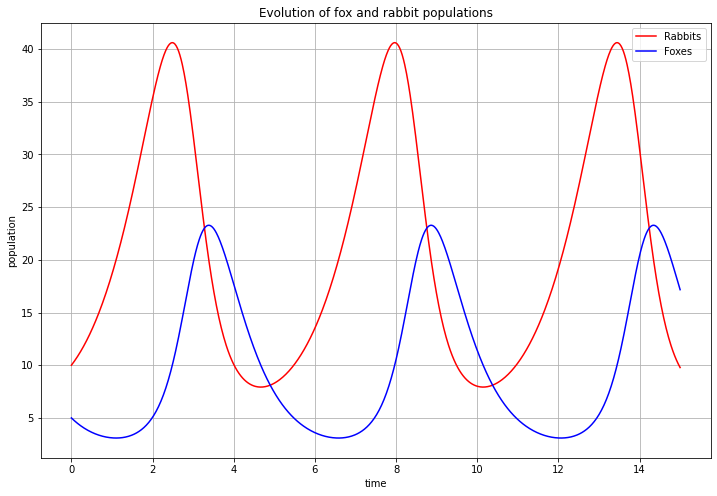

In [ ]:
#!python
rabbits, foxes = X.T
f1 = p.figure()
plt.figure(figsize=(12,8))
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
plt.show()

The populations are indeed periodic, and their period is close to the value T_f1 that we computed.

## Direction Fields and trajectories in phase plane

(0.0, 36.87747453556006)

<Figure size 432x288 with 0 Axes>

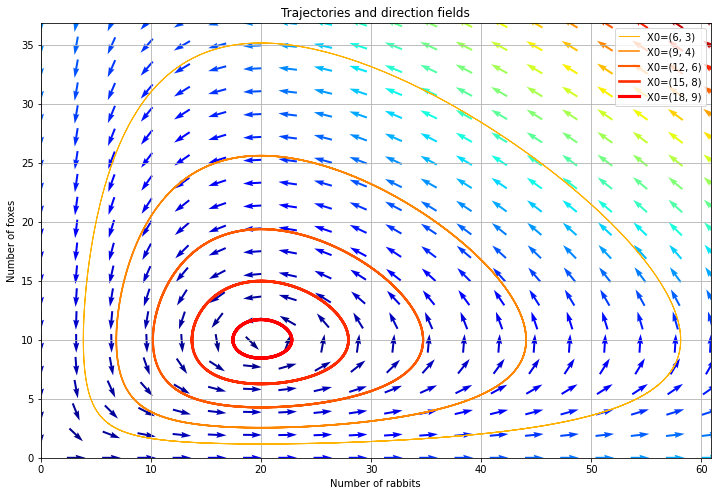

In [ ]:
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()
plt.figure(figsize=(12,8))
#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Draw direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed

p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)

"This graph shows us that changing either the fox or the rabbit population can have an unintuitive effect. If, in order to decrease the number of rabbits, we introduce foxes, this can lead to an increase of rabbits in the long run, depending on the time of intervention."

#Examples of normal Predator Prey, Separately 

Here I'm going to display a simple predator prey problem using differential equations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp





$\frac{dx}{dt} = rx-axy$

$\frac{dy}{dt} = cxy - my $


Key for below

$r = a_0$

$x=y_0$

$a=d_0$

$y = y_1$

$c = a_1$

$m = d_1$

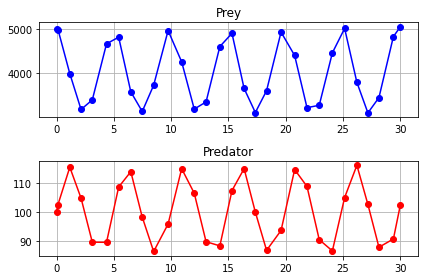

In [ ]:
def f(t,y):
  a0 = 2
  d0 = 0.02
  a1 = 0.0002
  d1 = 0.8
  y0 = y[0]
  y1 = y[1]
  return [a0*y0 - d0*y0*y1, a1*y0*y1 - d1*y1] 

tf = 30
prey0 = 5000
pred0 = 100
sol = solve_ivp(f, [0,tf],[prey0, pred0]   )
t = sol.t
y = sol.y[0]
yp = sol.y[1]

plt.subplot(2,1,1)
plt.plot(t,y,'bo-', label='y')
plt.title('Prey')
plt.grid()
plt.subplot(2,1,2)
plt.plot(t,yp,'ro-', label='dy')
plt.title('Predator')
plt.grid()
plt.tight_layout()
plt.show()

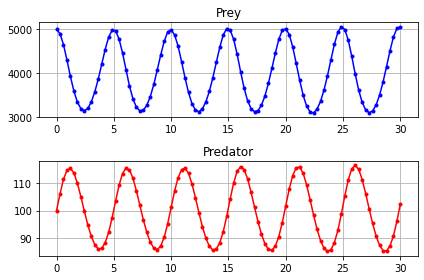

In [ ]:
t = np.linspace(0,30,100)
sol = solve_ivp(f, [0,tf],[prey0, pred0],t_eval=t )
#t = sol.t
y = sol.y[0]
yp = sol.y[1]

plt.subplot(2,1,1)
plt.plot(t,y,'b.-', label='y')
plt.title('Prey')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t,yp,'r.-', label='dy')
plt.title('Predator')
plt.grid()

plt.tight_layout()
plt.show()

Exact same Coupled System Theory below, but with different terms



$y_o = y$

$y_1 = y_o' = y'$

$y_1' = y''$

$y_o =$ prey

$y_1 =$ predator

$\frac{dy_o}{dt} = a_o y_o - d_oy_oy_1$

$\frac{dy_1}{dt} = a_1y_oy_1 - d_1y_1$


define Y 

\begin{bmatrix}
y_o \\
y_1 
\end{bmatrix}

define Y'

\begin{bmatrix}
\frac{dy_o}{dt} \\
\frac{dy_1}{dt}
\end{bmatrix}



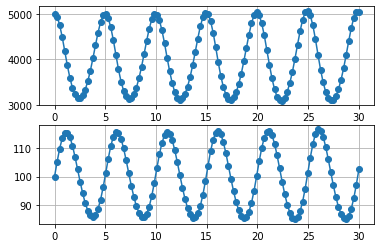

In [ ]:
def f(t,y):
  a0 = 2
  d0 = .02
  a1 = .0002
  d1 = .8
  y0 = y[0]
  y1 = y[1]
  return [a0*y0 - d0*y0*y1,a1*y0*y1 - d1*y1]

tf = 30
prey0 = 5000
pred0 = 100
t= np.linspace(0,30,120) #for use in t_eval. Otherwise leave t= sol.t
sol = solve_ivp(f,[0,tf],[prey0,pred0],t_eval=t)
#t = sol.t
y = sol.y[0]
yp = sol.y[1]

plt.subplot(2,1,1)
plt.plot(t,y,'o-')
plt.grid()
plt.subplot(2,1,2)
plt.plot(t,yp,'-o')
plt.grid()


# Weak Allee Effect Model

>$\frac{dx}{dt} = rx (1-\frac{x}{K}) \frac{x}{x+A} - axy$

>$\frac{dy}{dt}= c(ax)y-my$

>$x(0) \geq 0 $

>$y(0) \geq 0$

KEY


$r = a_0$

$x=y_0$

$a=d_0$

$y = y_1$

$c = a_1$

$m = d_1$

$K = $ carrying capacity

$A = $ weak allee effect constant

In [ ]:
def f(t,y):
  a0 = 2.65
  d0 = .002
  a1 = .215
  d1 = 1.06
  y0 = y[0]
  y1 = y[1]
  K = 900
  A = .01
  return [a0*y0*(1-y0/K)*(y0/(y0+A)) - d0*y0*y1, a1*(d0*y0)*y1 - d1*y1]



"\ny1 = np.linspace(-2.0, 8.0, 20)\ny2 = np.linspace(-2.0, 2.0, 20)\n\nY1, Y2 = np.meshgrid(y1, y2)\n\nt = 0\n\nu, v = np.zeros(Y1.shape), np.zeros(Y2.shape)\n\nNI, NJ = Y1.shape\n\nfor i in range(NI):\n    for j in range(NJ):\n        x = Y1[i, j]\n        y = Y2[i, j]\n        yprime = f([x, y], t)\n        u[i,j] = yprime[0]\n        v[i,j] = yprime[1]\n     \n\nQ = plt.quiver(Y1, Y2, u, v, color='r')\n\nplt.xlabel('$y_1$')\nplt.ylabel('$y_2$')\n\n"

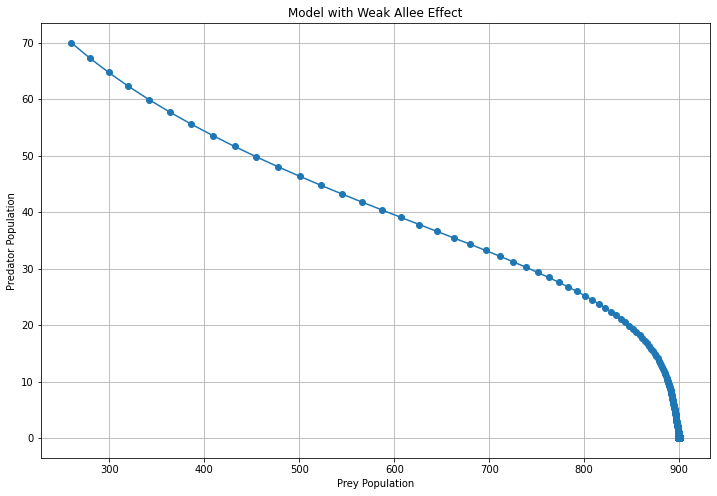

In [ ]:
tf = 50
prey0 = 260
pred0 = 70
t= np.linspace(0,50,1200) #for use in t_eval. Otherwise leave t= sol.t
sol = solve_ivp(f,[0,tf],[prey0,pred0],t_eval=t)
#t = sol.t
y = sol.y[0]
yp = sol.y[1]

'''
plt.subplot(2,1,1)
plt.title("Prey")
plt.plot(t,y,'o-')
plt.grid()

plt.subplot(2,1,2)
plt.title("Predator")
plt.plot(t,yp,'-o')
plt.grid()
'''

plt.figure(figsize=(12,8))
plt.plot(y,yp,'-o')
plt.title("Model with Weak Allee Effect")

plt.xlabel("Prey Population")
#plt.xlim(left=880,right=910)
#plt.ylim(bottom=0,top = 15)
plt.ylabel("Predator Population")
plt.grid()

'''
y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

'''

This graph doesn't look great, so I'm going to work on how to acquire the phase portrait model of this effect. Below is some testing to get a phase portrait model working for a pendulum. 


>$\frac{dx}{dt} = rx (1-\frac{x}{K}) \frac{x}{x+A} - axy$

>$\frac{dy}{dt}= c(ax)y-my$

$r = a_0$

$x=y_0$

$a=d_0$

$y = y_1$

$c = a_1$

$m = d_1$

In [ ]:
def f(t,y):
  a0 = 2.65
  d0 = .002
  a1 = .215
  d1 = 1.06
  y0 = y[0]
  y1 = y[1]
  K = 900
  A = .01
  return [a0*y0*(1-y0/K)*(y0/(y0+A)) - d0*y0*y1, a1*(d0*y0)*y1 - d1*y1]

In [ ]:
tf = 50
prey0 = 260
pred0 = 70
t= np.linspace(0,50,1200) #for use in t_eval. Otherwise leave t= sol.t
sol = solve_ivp(f,[0,tf],[prey0,pred0],t_eval=t)
#t = sol.t
y = sol.y[0]
yp = sol.y[1]


plt.figure(figsize=(12,8))
plt.plot(y,yp,'-o')
plt.title("Model with Weak Allee Effect")

plt.xlabel("Prey Population")
#plt.xlim(left=880,right=910)
#plt.ylim(bottom=0,top = 15)
plt.ylabel("Predator Population")
plt.grid()

# Phase Portrait Practice with Pendulum

"The phase portrait is a plot of a vector field which qualitatively shows how the solutions to these equations will go from a given starting point. here is our definition of the differential equations:"

"To generate the phase portrait, we need to compute the derivatives $y_1'$ and $y_2'$ at $t=0$ on a grid over the range of values for $y_1$ and $y_2$ we are interested in. We will plot the derivatives as a vector at each $(y_1, y_2)$ which will show us the initial direction from each point. We will examine the solutions over the range $-2 < y1 < 8 $, and $-2 < y2 < 2$ for $y_2$, and create a grid of 20 x 20 points."

Now, I will plot a few solutions on the vector field, where $y_1 (0) = 0$, and values of $y_2(0) = [0, \space .5, \space 1, \space 1.5, \space 2, \space 2.5]$

So, pendulum at angle of zero with some initial angular velocity

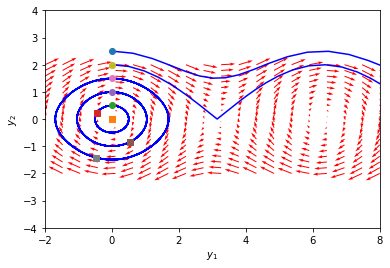

In [ ]:
from scipy.integrate import odeint

for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    
Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])
plt.show()

"For starting points near the origin, and small velocities, the pendulum goes into a stable limit cycle. For others, the trajectory appears to fly off into $y_1$ space. Recall that $y_1$ is an angle that has values from $-\pi$ to $\pi$. The $y_1$ data in this case is not wrapped around to be in this range."



x = prey population (pests)

y = predators

r = maximum amount of pest growth rate (OBSOLETE)

Beta = maximum growth rate of predators

K = pest carrying capacity

Theta = Allee Pressure

alpha = handling time of food

Zeta = quantity and quality of additional food provided to predators



